In [0]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


##**Brainstation ML Final Project 2019-2020**
##### Written by: Kourosh Azizi

####*This dataset contains the following data:*


* Timestamp
* Age
* Gender
* Country
* state: If you live in the United States, which state or territory do you live in?
* self_employed: Are you self-employed?
* family_history: Do you have a family history of mental illness?
* treatment: Have you sought treatment for a mental health condition?
* work_interfere: If you have a mental health condition, do you feel that it interferes with your work?
* no_employees: How many employees does your company or organization have?
* remote_work: Do you work remotely (outside of an office) at least 50% of the time?
* tech_company: Is your employer primarily a tech company/organization?
* benefits: Does your employer provide mental health benefits?
* care_options: Do you know the options for mental health care your employer provides?
* wellness_program: Has your employer ever discussed mental health as part of an employee wellness program?
* seek_help: Does your employer provide resources to learn more about mental health issues and how to seek help?
* anonymity: Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources?
* leave: How easy is it for you to take medical leave for a mental health condition?
* mental_health_consequence: Do you think that discussing a mental health issue with your employer would have negative consequences?
* phys_health_consequence: Do you think that discussing a physical health issue with your employer would have negative consequences?
* coworkers: Would you be willing to discuss a mental health issue with your coworkers?
* supervisor: Would you be willing to discuss a mental health issue with your direct supervisor(s)?
* mental_health_interview: Would you bring up a mental health issue with a potential employer in an interview?
* phys_health_interview: Would you bring up a physical health issue with a potential employer in an interview?
* mental_vs_physical: Do you feel that your employer takes mental health as seriously as physical health?
* obs_consequence: Have you heard of or observed negative consequences for coworkers with mental health conditions in your workplace?
* comments: Any additional notes or comments

###**Question trying to answer:**


#### 1.   Based on the given data set from the conducted suvey on mental health, does a person need treatment or not?

The motivation behind this question is to understand if individuals dealing with mental health issues go through the process of treatment or not. Some peple identify to have issues, but they don't seek help or treatment. I wanted to be able to create a model that can predict if the individual needs treatment or not.



In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import feature_selection
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.datasets import make_classification
from sklearn.preprocessing import LabelEncoder, MinMaxScaler


%matplotlib inline
import seaborn as sns
sns.set(style="ticks")
sns.set(rc={'figure.figsize':(15,10)})

In [381]:
df = pd.read_csv('/content/drive/My Drive/Brainstation/survey.csv')
df.columns = [x.lower() for x in df.columns]  # change columns to lower case
df.head(10)

,timestamp,age,gender,country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,No,Yes,Yes,Not sure,No,Yes,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,No,No,Don't know,No,Don't know,Don't know,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,No,Yes,No,No,No,No,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,No,Yes,No,Yes,No,No,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,Yes,Yes,Yes,No,Don't know,Don't know,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN
5,2014-08-27 11:31:22,33,Male,United States,TN,NaN,Yes,No,Sometimes,6-25,No,Yes,Yes,Not sure,No,Don't know,Don't know,Don't know,No,No,Yes,Yes,No,Maybe,Don't know,No,NaN
6,2014-08-27 11:31:50,35,Female,United States,MI,NaN,Yes,Yes,Sometimes,1-5,Yes,Yes,No,No,No,No,No,Somewhat difficult,Maybe,Maybe,Some of them,No,No,No,Don't know,No,NaN
7,2014-08-27 11:32:05,39,M,Canada,NaN,NaN,No,No,Never,1-5,Yes,Yes,No,Yes,No,No,Yes,Don't know,No,No,No,No,No,No,No,No,NaN
8,2014-08-27 11:32:39,42,Female,United States,IL,NaN,Yes,Yes,Sometimes,100-500,No,Yes,Yes,Yes,No,No,No,Very difficult,Maybe,No,Yes,Yes,No,Maybe,No,No,NaN
9,2014-08-27 11:32:43,23,Male,Canada,NaN,NaN,No,No,Never,26-100,No,Yes,Don't know,No,Don't know,Don't know,Don't know,Don't know,No,No,Yes,Yes,Maybe,Maybe,Yes,No,NaN


In [0]:
df.info

In [0]:
# using pandas profiling, we can get this overview information:

"""
Overview
Dataset info

Number of variables	27

timestamp has a high cardinality: 1246 distinct values Warning
age is highly skewed (γ1 = 35.482) Skewed
state has 515 / 40.9% missing values Missing
self_employed has 18 / 1.4% missing values Missing
work_interfere has 264 / 21.0% missing values Missing
comments has 1095 / 87.0% missing values Missing
comments has a high cardinality: 161 distinct values Warning
"""

# Data Cleaning & Transformation:

* Handle null values
* Handle misspelled genders
* Handle age distribution
* Encode data

### *Handle Null values:*

* All columns


In [382]:
try:
  cols = df.columns.tolist()
  ### age is type (int), but the rest are type (str)
  cols.remove('age')  

  for col in df:
      if col in 'age':
        df[col] = df[col].fillna(0)
      elif col in cols:
        df[col] = df[col].fillna('NaN')
      else:
        print('Unknown column: ', col)


  ### fill null values with median
  df['age'].fillna(df['age'].median(), inplace = True)

  ### fill any age < 18 and > 120 with median
  s = pd.Series(df['age'])
  s[s < 18] = df['age'].median()
  df['age'] = s
  s = pd.Series(df['age'])
  s[s > 120] = df['age'].median()
  df['age'] = s


  # replace NaN with No 
  df.self_employed = df.self_employed.apply(
      lambda x:"No" if str(x) is "NaN" else x)

  df.work_interfere = df.work_interfere.apply(
      lambda x: "Not sure" if str(x) is "NaN" else x)

  print('Success!')
except Exception as e: 
  print('** Warning ** : Columns are already removed! (Safe to ignore)')

Success!


### *Remove uncessary columns:*


In [383]:
try:
  # remove unwanted columns
  removed_cols = ['timestamp', 'state', 'comments', 'country']
  for col in removed_cols:
    df = df.drop([col], axis= 1)

  print('Success!')
except Exception as e:
  print('** Warning ** : Columns are already removed! (Safe to ignore)')

Success!


*Handle misspelled genders:*

In [384]:
try:
  df.gender = df.gender.str.lower()

  male = ["male", "m", "male-ish", "maile", "mal", "male (cis)", "make", 
          "male ", "man", "msle", "mail", "malr","cis man", "cis male"]

  other = ["non-binary", "nah", "all", "enby", "fluid", "genderqueer", 
            "androgyne", "agender", "male leaning androgynous", "guy (-ish) ^_^", 
            "neuter", "queer", "ostensibly male, unsure what that really means", 
            "queer/she/they", "something kinda male?", "trans-female",  
            "trans woman", "female (trans)"]  

  female = ["cis female", "f", "female", "woman",  "femake", "female ",
            "cis-female/femme", "female (cis)", "femail"]

  # assign each row to one of the following
  df.gender = df.gender.apply(lambda x:"male" if x in male else x)
  df.gender = df.gender.apply(lambda x:"female" if x in female else x)
  df.gender = df.gender.apply(lambda x:"other" if x in other else x)

  # drop rows with unmeaningful value
  df.drop(df[df.gender == 'a little about you'].index, inplace=True)
  df.drop(df[df.gender == 'p'].index, inplace=True)

  print('Genders: ', df.gender.unique())
  print('Success!')
except Exception as e:
  print("** Warning **: Something went wrong!")

Genders:  ['female' 'male' 'other']
Success!


### *Scale Data:*
* Age

In [0]:
def scale_data(df):
  try:
    scaler = MinMaxScaler()
    train_df = df.copy()
    train_df['age'] = scaler.fit_transform(df[['age']])
    train_df.head()

    print('Success!')
    return train_df

  except Exception as e:
    print('**Warning**: Something went wrong!')

###*Encode Data:*

In [0]:
### this function is to be called later in the future
def encode_data(df):
  try:
    labels_dict = {}

    temp_df = df.copy()       # make a copy
    for feature in temp_df:
        le = preprocessing.LabelEncoder()
        le.fit(temp_df[feature])
        label_name_map = dict(zip(le.classes_, le.transform(le.classes_)))
        temp_df[feature] = le.transform(temp_df[feature])
        # Get labels
        key = 'label_' + feature
        val = [*label_name_map]
        labels_dict[key] =val
    
    print("Success!")
    return temp_df

  except Exception as e:
    print("** Warning**: Something went wrong!")
    raise(e)

# Data Visualizations:

###*Get top 5 features:*

Success!


Text(0.5, 1.0, 'Probability of impact on top features')

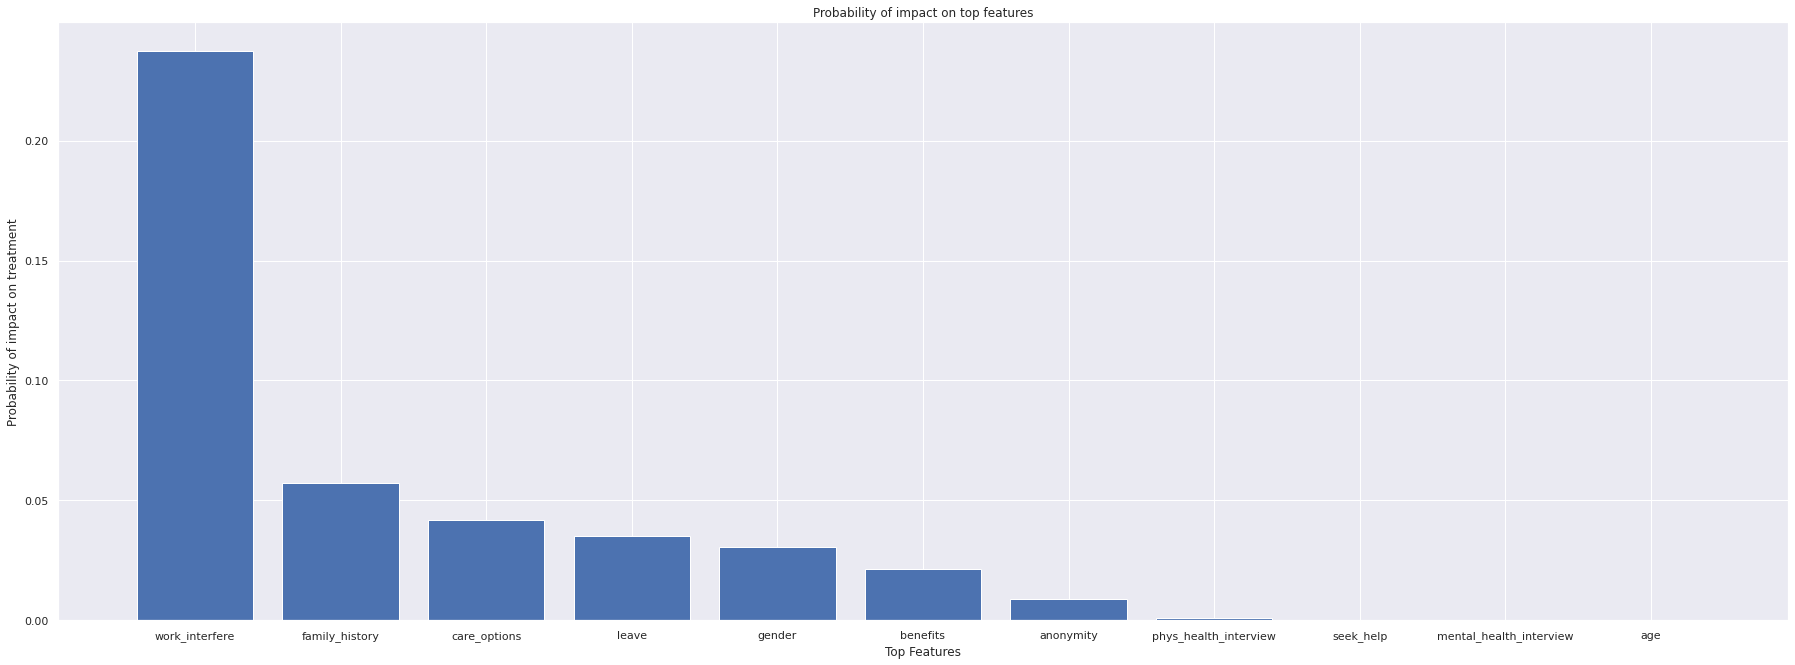

In [387]:
temp_df = encode_data(df)     ### temporary encode data to get the top features
features = ['family_history', 
            'care_options', 
            'benefits',
            'gender',
            'seek_help',
            'mental_health_interview',
            'phys_health_interview',
            'anonymity', 
            'leave', 
            'work_interfere',
            'age'
            ]
imp_features = feature_selection.mutual_info_regression(temp_df[features], 
                                                        temp_df.treatment)

top_features_df = pd.DataFrame(list(zip(features, imp_features)), 
                               columns=['feature','importance'])

top_features_df.sort_values(by='importance', ascending=False, inplace=True)
best_features = [x for x in top_features_df['feature']]


plt.rcParams['figure.figsize'] = (len(best_features)+20, len(best_features))

plt.bar(top_features_df['feature'], top_features_df['importance'])
plt.xlabel('Top Features')
plt.ylabel('Probability of impact on treatment')
plt.title('Probability of impact on top features')


###*Plot age distribution graph:*

Text(0, 0.5, 'Number of people')

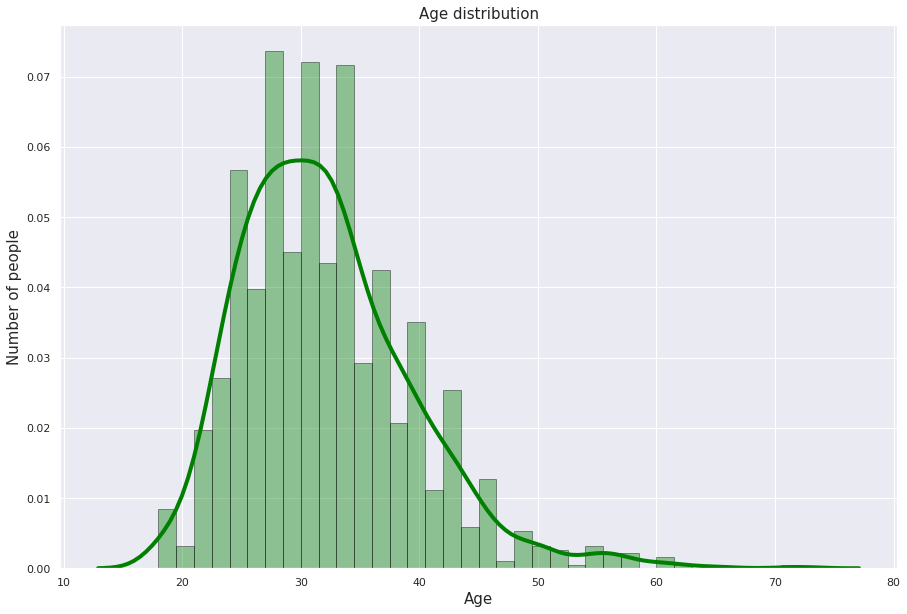

In [390]:
### please run this cell twice to adjust the figure size

sns.distplot(df['age'], hist=True, kde=True, 
            bins=int(180/5), color = 'green',
            hist_kws={'edgecolor':'black'},
            kde_kws={'linewidth': 4},
            label = 'Age')

plt.rcParams['figure.figsize'] = (15, 10)
plt.title('Age distribution', size = 15)
plt.xlabel('Age', size = 15)
plt.ylabel('Number of people', size = 15)

### *Age distribution with respect to treatment:*

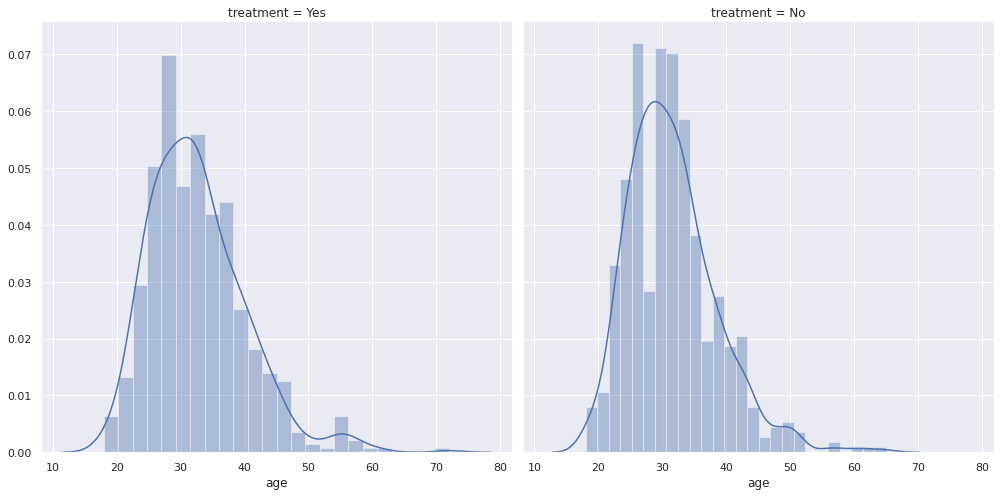

In [368]:
### compare the distribution using the treatment column
g = sns.FacetGrid(df, col='treatment', height=7)
g = g.map(sns.distplot, "age")

### *Are the top features good indicators of people who receive treatment or not?*


* seek_help - Does your employer provide resources to learn more about mental health issues and how to seek help?
* treatment - Have you sought treatment for a mental health condition?
* benefits - Does your employer provide mental health benefits?
* care_options - Do you know the options for mental health care your employer provides?
* wellness_program - Has your employer ever discussed mental health as part of an employee wellness program?
* family_history - Do you have a family history of mental illness?





-------------work_interfere-------------



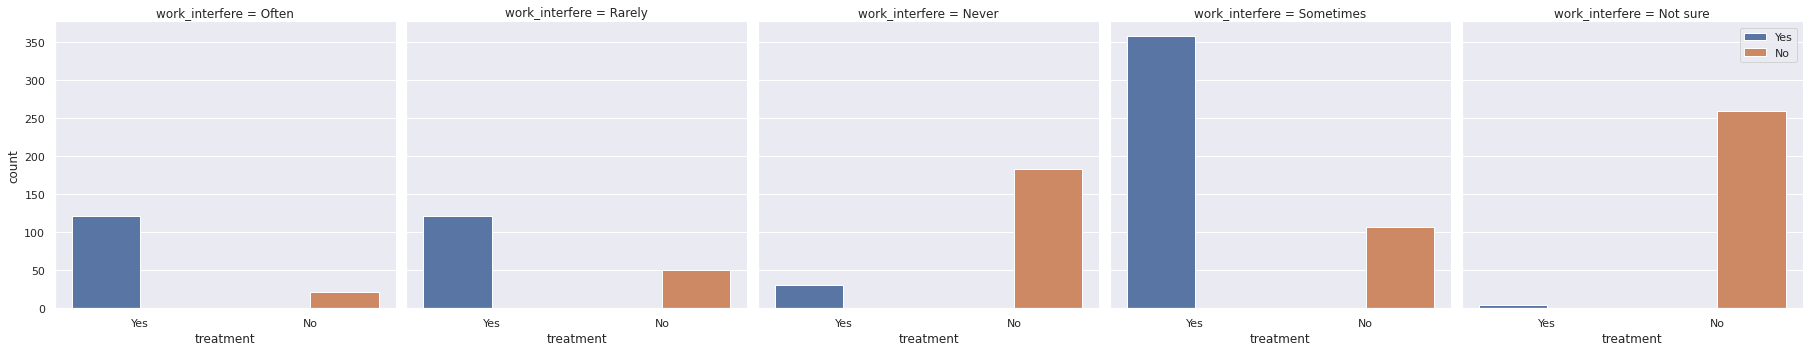


-------------family_history-------------



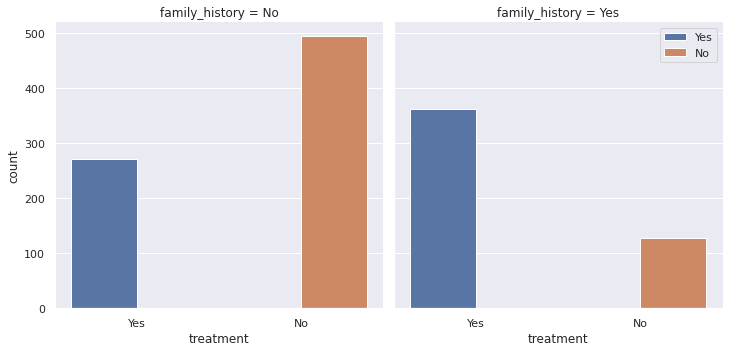


-------------mental_health_interview-------------



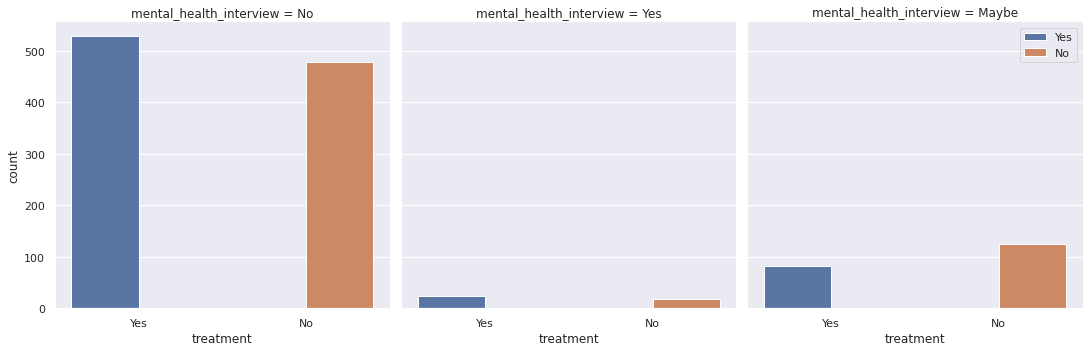


-------------benefits-------------



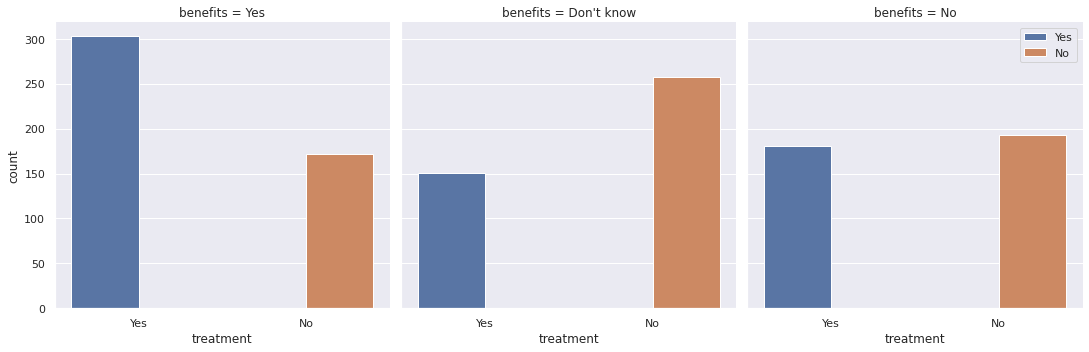


-------------age-------------



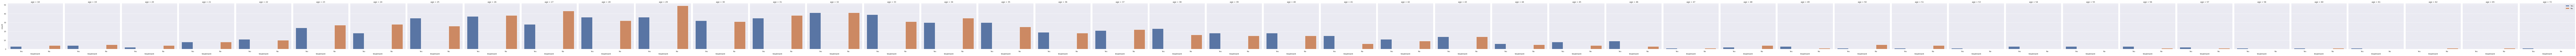


-------------care_options-------------



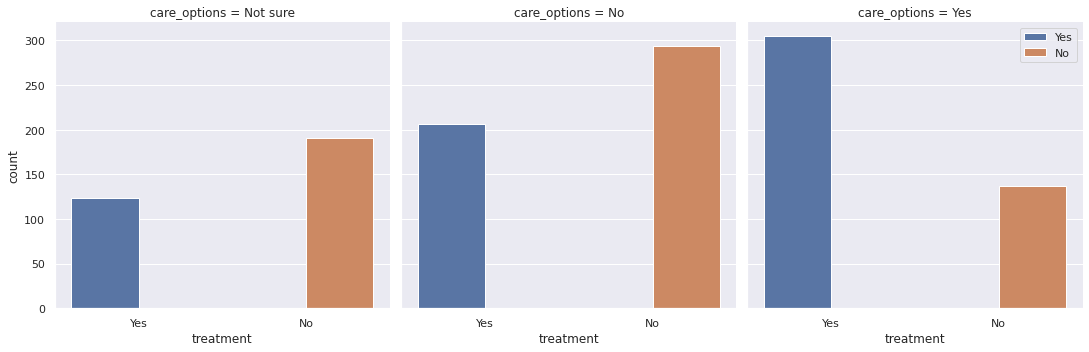


-------------leave-------------



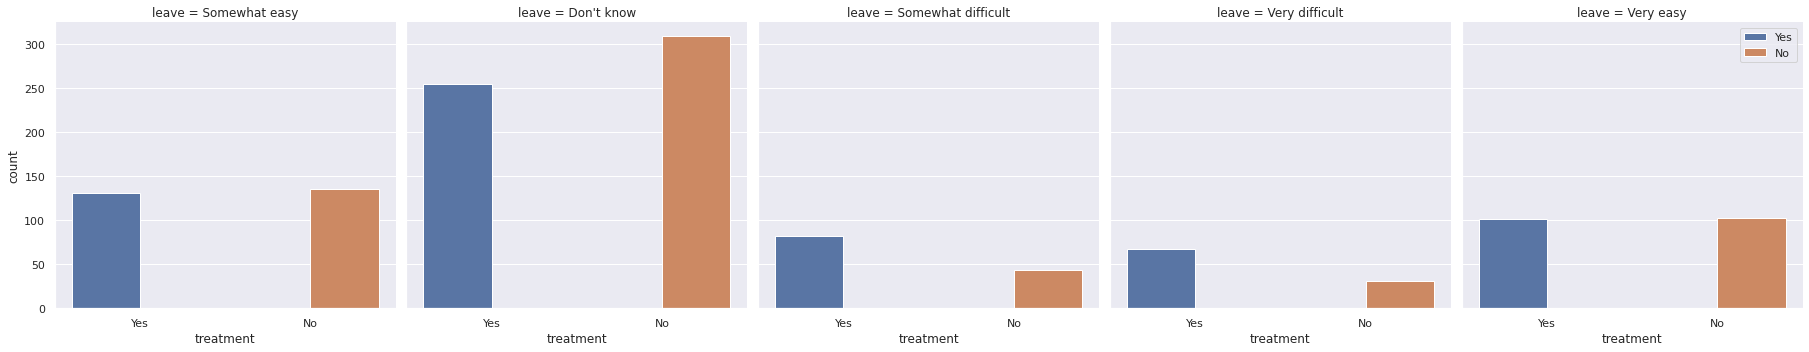


-------------seek_help-------------



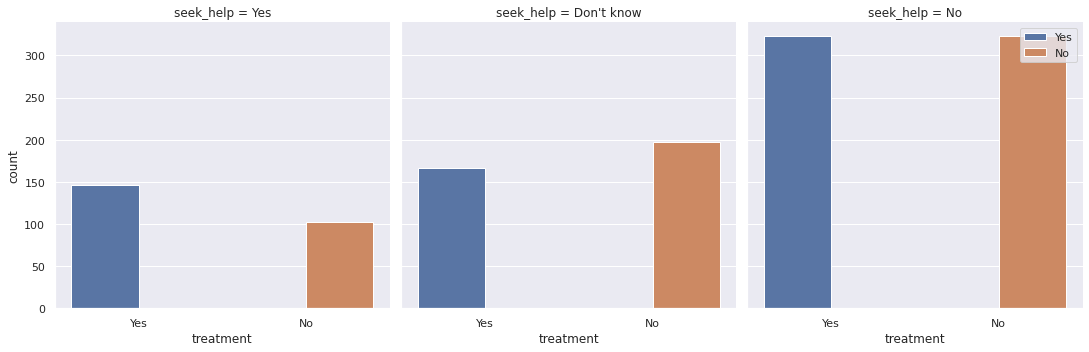


-------------gender-------------



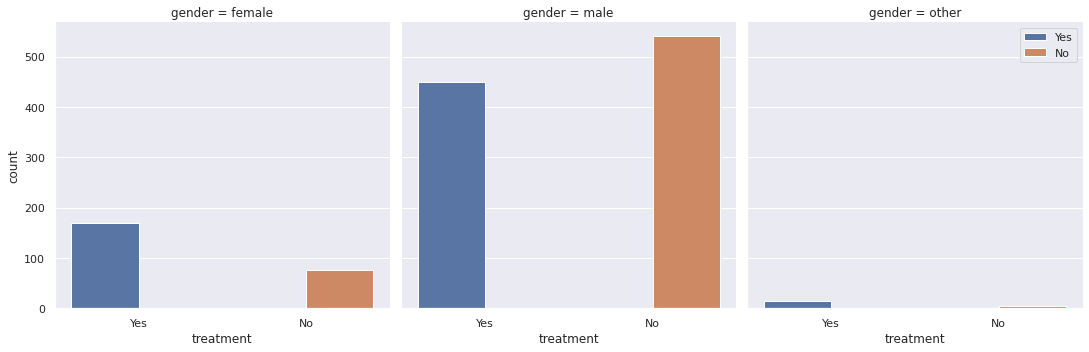


-------------phys_health_interview-------------



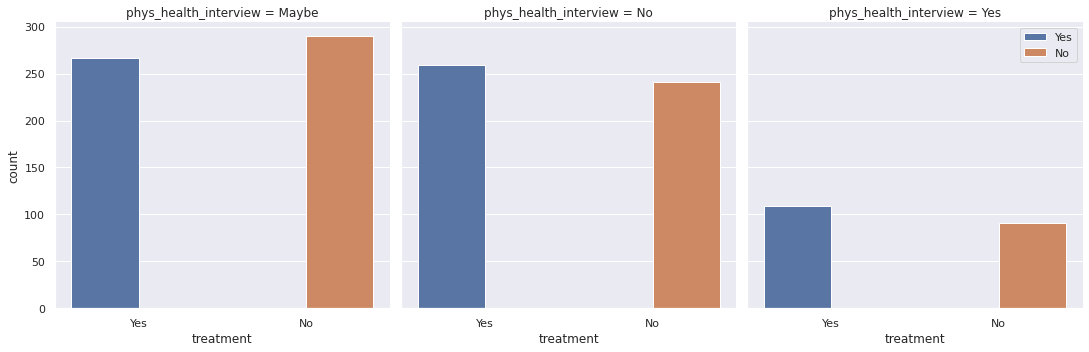


-------------anonymity-------------



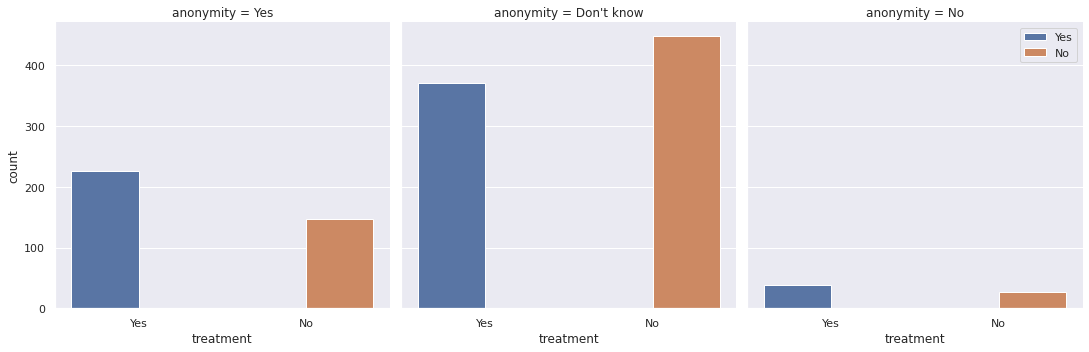

In [369]:
for feature in best_features:   ### go through all the top features
  sns.catplot(x='treatment', hue='treatment', col=feature, kind='count', data=df)
  plt.legend(loc='upper right')
  print(f'\n-------------{feature}-------------\n')
  plt.show()

### *The Train/Test Split:*

In [392]:
df = encode_data(df)
df = scale_data(df)

feature_cols = best_features

# split the data so the train set contains 60% of the points. Ignore random_state.
split = 0.40
X_train, X_test, Y_train, Y_test = train_test_split(df[feature_cols], 
                                                    df.treatment, 
                                                    test_size=split, 
                                                    random_state=0)

import sklearn as sk
linear_regression_model = sk.linear_model.LinearRegression()
model = linear_regression_model.fit(X_train, Y_train)

# evaluate the model score for training and testing set
print("The R2 score on the training set:", model.score(X_train, Y_train))
print("The R2 score on the testing set:", model.score(X_test, Y_test))


Success!
Success!
The R2 score on the training set: 0.43795214301614077
The R2 score on the testing set: 0.3718454543740196


### *Visualize and refine model:*


* Cross Validation
* F1 Score



====================== Cross Validation Accuracy ======================

CV score attempt 1:  0.8289473684210527
CV score attempt 2:  0.881578947368421
CV score attempt 3:  0.7631578947368421
CV score attempt 4:  0.7763157894736842
CV score attempt 5:  0.8133333333333334
CV score attempt 6:  0.7333333333333333
CV score attempt 7:  0.8
CV score attempt 8:  0.7866666666666666
CV score attempt 9:  0.84
CV score attempt 10:  0.76

CV mean accuracy score: 0.798 +/- 0.042 



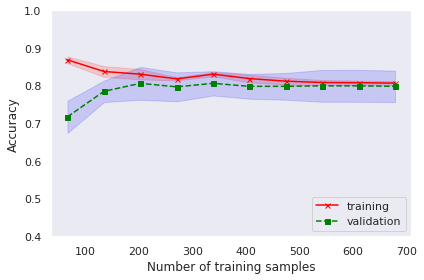

In [393]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

pipe_lr = Pipeline([('scl', StandardScaler()),
                  # ('pca', PCA(n_components=2)),   ### removing will ignore bias
                  ('clf', LogisticRegression(penalty='l2', 
                                              C = 10000, 
                                              random_state=1))])

scores = cross_val_score(estimator=pipe_lr, 
                         X=X_train, 
                         y=Y_train, 
                         cv=10,
                         n_jobs=1)

print('====================== Cross Validation Accuracy ======================\n')

n = 1
for score in scores:
  print(f'CV score attempt {n}: ', score)
  n+=1


print('\nCV mean accuracy score: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)), '\n')


train_sizes, train_scores, cv_scores =\
                learning_curve(estimator=pipe_lr, 
                X=X_train, 
                y=Y_train, 
                train_sizes=np.linspace(0.1, 1.0, 10), 
                cv=10,
                n_jobs=1)


train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
cv_mean = np.mean(cv_scores, axis=1)
cv_std = np.std(cv_scores, axis=1)

plt.plot(train_sizes, 
         train_mean, 
         color='red', 
         marker='x', 
         markersize=5, 
         label='training')

plt.fill_between(train_sizes, 
                 train_mean + train_std,
                 train_mean - train_std, 
                 alpha=0.15, 
                 color='red')

plt.plot(train_sizes, 
         cv_mean, 
         color='green', 
         linestyle='--', 
         marker='s', 
         markersize=5, 
         label='validation')

plt.fill_between(train_sizes, 
                 cv_mean + cv_std,
                 cv_mean - cv_std, 
                 alpha=0.15, color='blue')

plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.4, 1.0])
plt.tight_layout()
plt.show()

### *Grid Search:*

In [372]:
from sklearn.model_selection import GridSearchCV
param_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]

param_grid = [{'clf__C': param_range}]

gs = GridSearchCV(estimator=pipe_lr, 
                  param_grid=param_grid, 
                  scoring='accuracy', 
                  cv=2,
                  n_jobs=-1)


scores = cross_val_score(gs, X_train, Y_train, scoring='accuracy', cv=5)
print('GridSearchCV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

gs = gs.fit(X_train, Y_train)
print('GridSearchCV best score: ', gs.best_score_)

print('Best Parameter: ', gs.best_params_.get('clf__C'))  # hyper parameter

GridSearchCV accuracy: 0.796 +/- 0.033
GridSearchCV best score:  0.7984084880636605
Best Parameter:  1.0


### *Run Logistic Regression model on training data set:*

In [373]:
from sklearn.metrics import classification_report

stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.fit_transform(X_test)

parameter = gs.best_params_.get('clf__C')
clf = LogisticRegression(C=parameter).fit(X_train_std,Y_train)
y_true, y_pred = Y_test, clf.predict(X_test_std)

print('============================== Classification Report ==============================\n')
print(classification_report(y_true, y_pred))

============================== Classification Report ==============================

              precision    recall  f1-score   support

           0       0.82      0.76      0.79       252
           1       0.77      0.83      0.80       251

    accuracy                           0.80       503
   macro avg       0.80      0.80      0.79       503
weighted avg       0.80      0.80      0.79       503



### *Different model: Boosting*

In [394]:
from sklearn import metrics
from sklearn.metrics import accuracy_score, mean_squared_error, precision_recall_curve
from sklearn.preprocessing import binarize, LabelEncoder, MinMaxScaler


def evaluate_model(model, y_test, y_pred_class, plot=False):
    X = df[feature_cols]
    y = df.treatment

    ### true vs predicted values
    print('First 25 samples: \n')
    print('True:', y_test.values[0:25])
    print('Pred:', y_pred_class[0:25], '\n')
    
    ### classification accuracy: percentage of correct predictions
    # print('Accuracy:', metrics.accuracy_score(y_test, y_pred_class))
    print('Percentage of 1:', y_test.mean())
    print('Percentage of 0:',1 - y_test.mean())
  
    ### use confusion metrix to find what kind of errors your classifier is making
    confusion = metrics.confusion_matrix(y_test, y_pred_class)
    TP = confusion[1, 1]
    TN = confusion[0, 0]
    FP = confusion[0, 1]
    FN = confusion[1, 0]
    
    # false positive tells us how often the prediction is incorrect
    false_positive_rate = FP / float(TN + FP)
    print('False Positive Rate:', false_positive_rate)
    
    accuracy = metrics.accuracy_score(y_test, y_pred_class)
    return accuracy, 1-accuracy


from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

print('============== Boosting using Decision Tree Classifier ==============')
clf = DecisionTreeClassifier(criterion='entropy', max_depth=1)
boost = AdaBoostClassifier(base_estimator=clf, n_estimators=500)
boost.fit(X_train, Y_train)
y_pred_class = boost.predict(X_test)
accuracy_score, error_score = evaluate_model(boost, Y_test, y_pred_class, True)

print('----------------------------------------------')
print('Classification Accuracy: ', accuracy_score)#svc = SVC(kernel='linear',C=0.1).fit(X_train_std, y_train)
clf = LogisticRegression(C=0.01).fit(X_train_std,y_train)
y_true, y_pred = y_test, clf.predict(X_test_std)
print(classification_report(y_true, y_pred))
print('Classification Error: ', error_score)
print('----------------------------------------------')


============== Boosting using Decision Tree Classifier ==============
First 25 samples: 

True: [0 0 0 0 0 0 0 0 1 1 0 1 1 0 1 1 0 1 0 0 0 1 1 0 0]
Pred: [1 0 0 0 1 1 0 1 1 1 0 1 1 0 1 1 1 1 0 0 0 0 1 0 1] 

Percentage of 1: 0.4990059642147117
Percentage of 0: 0.5009940357852882
False Positive Rate: 0.25
----------------------------------------------
Classification Accuracy:  0.8071570576540755
Classification Error:  0.19284294234592447
----------------------------------------------


###*The most impacting features:*

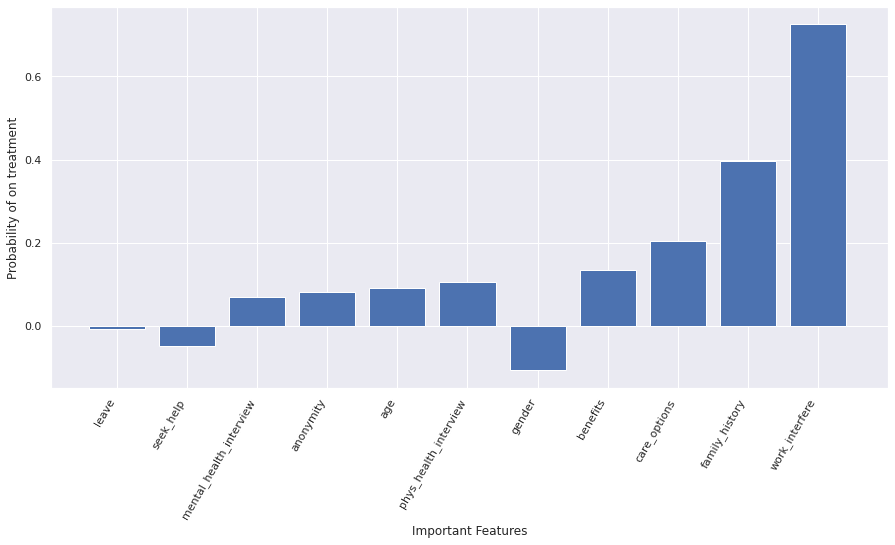

In [375]:
clf = LogisticRegression(C=0.01).fit(X_train_std,Y_train)

order = np.argsort(abs(clf.coef_))
lab = clf.coef_.ravel()
lab = lab[order].T.ravel()
feature_names = X_train.columns[order].ravel()

plt.figure(figsize=(15, 7))
plt.bar(np.arange(len(X_train.columns)),lab)
plt.xticks(np.arange(1+len(X_train.columns)),feature_names, rotation=60, ha='right')
plt.xlabel('Important Features')
plt.ylabel('Probability of on treatment')
plt.show()



### *Conclusion:*

* We can see the **top 4 features** that affect whether a person should receive treatment or not. In my opinion work_interfere, and family history are great indicators of someone current having mental health issues or atleast he/she have previously experienced it. Care options and benefits also determine whether a person has access to resources that provide support regarding mental health. 


* We can also see the **age distribution** is skewed toward people that are younger, and we have less data for people who are older than the 25-30 range. This can help us have a better prediction accuracy for that age group.


* Also there is a chance that **religion** might have affected this dataset, so being able to study it would have provided value of why some people don't get treatment.


* Also information on how the data was collected can help to better understand the result. **Comment** section in the data set can help a lot with this, but there were a lot of missing values, so it wasn't accurate to use it.
